In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests

In [3]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://richmond.craigslist.org/search/sss?query=guitars#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

In [4]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content, 'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

In [9]:
import re
brands = ['Martin','Chibson','Gibson','Fender','Jackson','Ibanez', 'Hondo','Epiphone',"dean"]

data = []
for listing in listings:
    title = listing.find('div',class_='title').get_text().strip().lower()
    price_element = listing.find('div',class_='price')
    if price_element:
      price = price_element.get_text().strip()
      price = re.sub(r'[^0-9]',"",price)
      price = int(price) if price else np.nan
    else:
      price = np.nan
    link = listing.find(href=True)['href']

    words = title.split()
    hits = [word for word in words if word in brands]
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]

    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title )
    if regex_search is None:
        year = np.nan
    else:
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

In [10]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].astype(str).str.replace('$','')
df['price'] = df['price'].astype(str).str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age']=2025-df['year']
print(df.shape)
df.to_csv('guitar_listings.csv')
#print(df['brand'].value_counts())
df.head()

(207, 6)


,title,price,year,link,brand,age
0,martin hpl “art top” guitars-reduced,550.0,NaN,https://richmond.craigslist.org/msg/d/richmond...,missing,NaN
1,valley guitars warmoth custom shop pj flamed t...,1040.0,NaN,https://richmond.craigslist.org/msg/d/richmond...,missing,NaN
2,"chibson bass & guitars for sale or trade ""not ...",1.0,NaN,https://richmond.craigslist.org/msg/d/palmyra-...,missing,NaN
3,electric guitars and amps,125.0,NaN,https://richmond.craigslist.org/msg/d/mechanic...,missing,NaN
4,several guitars for sale,1.0,NaN,https://richmond.craigslist.org/msg/d/midlothi...,missing,NaN


count     206.000000
mean      652.004854
std       913.813299
min         0.000000
25%        82.500000
50%       312.500000
75%       900.000000
max      5500.000000
Name: price, dtype: float64


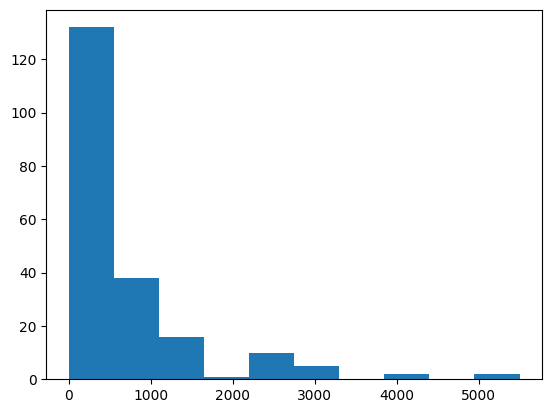

count    36.000000
mean     33.277778
std      20.996069
min       1.000000
25%      15.000000
50%      32.500000
75%      51.000000
max      76.000000
Name: age, dtype: float64


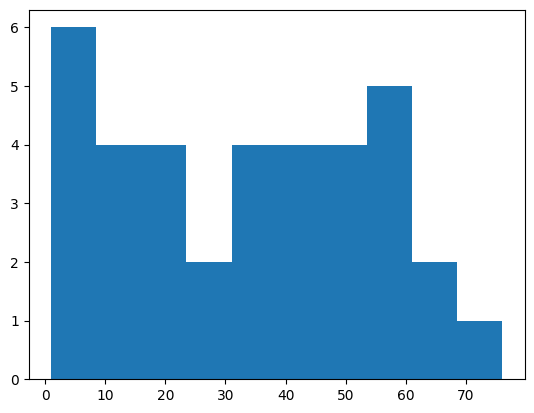

In [7]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [17]:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                   
         count mean  std  min  25%  50%  75%  max
brand                                            
missing  196.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Similar to what I mention below I for the life of me cannot get the brand variable to work.

In [18]:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                              
        count  mean        std  min   25%   50%   75%   max
brand                                                      
missing  35.0  32.2  21.986359  1.0  14.5  32.0  49.5  76.0

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


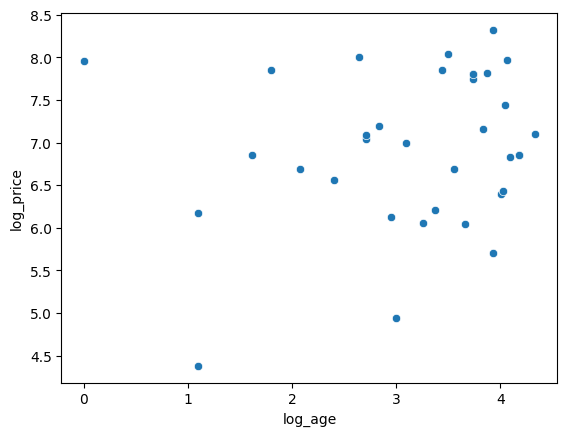

In [14]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price')


I've been tooling around with brand for a couple of hours now and for whatever reason I cannot get it to work, I don't know what the deal is but I figured it'd be better to put something down rather than nothing. This indicates that as the age increases the price does as well, likely because most people don't want to spend $2000 on a used guitar.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


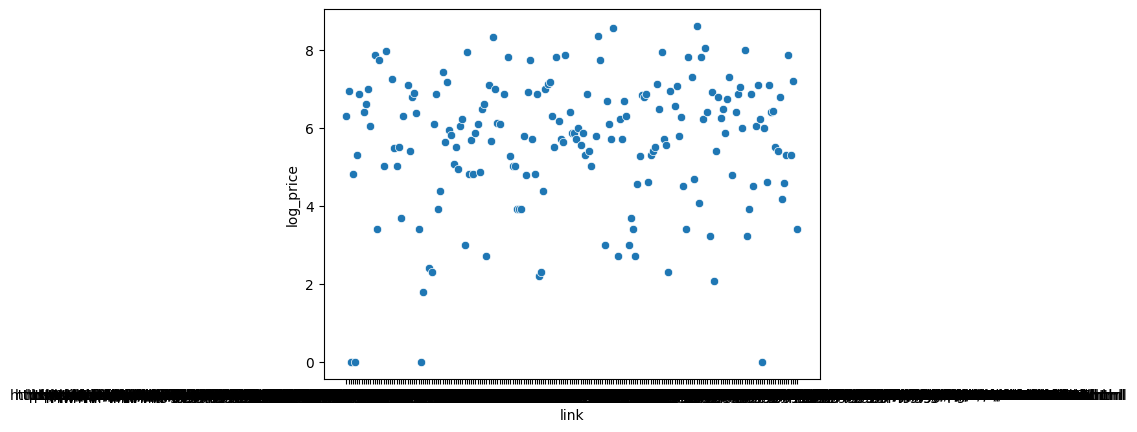

In [17]:
df['link'] = (df['link'])
df['log_price'] = np.log(df['price'])

ax = sns.scatterplot(data=df, x='link', y='log_price')

I had no how this would represent the link for the listing but I thought it'd be interesting to compare to price, I can't say I see anything meaningful represented in the data.